<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/7_Fashion_MNIST_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with LSTM

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D,GlobalMaxPooling1D,LSTM,GRU,Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np


In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train ,X_test = X_train/255.0,X_test/255.0
X_train.shape

(60000, 28, 28)

Convolution: N * W * H *C

RNN : N* T * D

In [30]:
T = X_train[0].shape[0]
i =Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10,activation='softmax')(x)
model = Model(i,x)

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7580 - accuracy: 0.7266 - val_loss: 0.4384 - val_accuracy: 0.8363
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4110 - accuracy: 0.8480 - val_loss: 0.4254 - val_accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3598 - accuracy: 0.8660 - val_loss: 0.3616 - val_accuracy: 0.8683
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3244 - accuracy: 0.8770 - val_loss: 0.3375 - val_accuracy: 0.8775
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3066 - accuracy: 0.8849 - val_loss: 0.3272 - val_accuracy: 0.8784
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2907 - accuracy: 0.8912 - val_loss: 0.3128 - val_accuracy: 0.8845
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2662 - accuracy: 0.9001 - val_loss: 0.2997 - val_accuracy:

In [33]:

i =Input(shape=X_train[0].shape)
x = LSTM(128,return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(10,activation='softmax')(x)
improved_model = Model(i,x)

In [34]:
improved_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
improved_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8214 - accuracy: 0.7089 - val_loss: 0.4621 - val_accuracy: 0.8322
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4219 - accuracy: 0.8434 - val_loss: 0.3936 - val_accuracy: 0.8551
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3686 - accuracy: 0.8647 - val_loss: 0.3793 - val_accuracy: 0.8606
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3316 - accuracy: 0.8764 - val_loss: 0.3398 - val_accuracy: 0.8791
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3115 - accuracy: 0.8833 - val_loss: 0.3265 - val_accuracy: 0.8783
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2897 - accuracy: 0.8923 - val_loss: 0.3276 - val_accuracy: 0.8774
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.8976 - val_loss: 0.3137 - val_ac

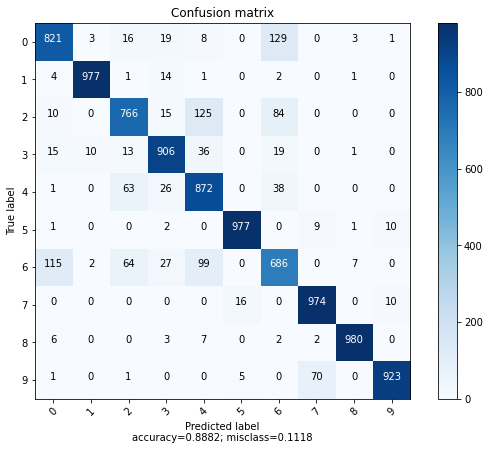

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
 
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
from sklearn.metrics import  confusion_matrix
y_pred=model.predict(X_test).argmax(axis=1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), list(range(10)))

Text(0.5, 1.0, 'actual_data: Pullover, Predict: Coat')

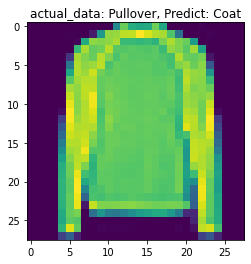

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
misclassified_idx=np.where(y_pred!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28),cmap=None)
plt.title("actual_data: %s, Predict: %s"%(class_names[y_test[i]],class_names[ y_pred[i]]))